# **1. Introduction to Dataset**


The dataset is taken from kaggle [kaggle link](https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset)


The Ship Performance Dataset offers a realistic, synthetically generated collection of operational metrics for diverse ship types navigating the Gulf of Guinea. Designed for maritime data analysts, machine learning experts, and industry professionals, this dataset facilitates the exploration of clustering, predictive modeling, and optimization within the maritime domain.

Given the maritime sector's pivotal role in global commerce and its substantial impact on economic and environmental sustainability, understanding ship performance, fuel efficiency, and operational costs is crucial. This dataset serves as a valuable resource for uncovering performance trends, identifying underlying patterns, and developing data-driven solutions to real-world maritime challenges.


# **2. Import Library**


In [51]:
!pip install statsmodels

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans, BisectingKMeans, SpectralClustering, AgglomerativeClustering
from sklearn.decomposition import FastICA

# **3. Data Wrangling**


## Load Dataset


In [53]:
df = pd.read_csv("./Ship_Performance_Dataset.csv")

## Assess Dataset


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [55]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [56]:
df.nunique()

Date                         57
Ship_Type                     4
Route_Type                    4
Engine_Type                   3
Maintenance_Status            3
Speed_Over_Ground_knots    2736
Engine_Power_kW            2736
Distance_Traveled_nm       2736
Draft_meters               2736
Weather_Condition             3
Cargo_Weight_tons          2736
Operational_Cost_USD       2736
Revenue_per_Voyage_USD     2736
Turnaround_Time_hours      2736
Efficiency_nm_per_kWh      2736
Seasonal_Impact_Score      2736
Weekly_Voyage_Count           9
Average_Load_Percentage    2736
dtype: int64

In [57]:
categorical_features = ['Ship_Type', 'Route_Type',
                        'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

numerical_features = [col for col in df.columns if (
    col not in categorical_features and col != 'Date')]

In [58]:
df[categorical_features]

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
0,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,Moderate
1,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,Container Ship,Long-haul,Diesel,Fair,Moderate
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,Fish Carrier,Transoceanic,Diesel,Fair,Moderate
...,...,...,...,...,...
2731,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate
2732,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,NaN
2733,Container Ship,Short-haul,Steam Turbine,Critical,NaN
2734,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate


In [59]:
df['Route_Type'].unique()

array([nan, 'Short-haul', 'Long-haul', 'Transoceanic', 'Coastal'],
      dtype=object)

In [60]:
df['Engine_Type'].unique()

array(['Heavy Fuel Oil (HFO)', 'Steam Turbine', 'Diesel', nan],
      dtype=object)

In [61]:
df['Maintenance_Status'].unique()

array(['Critical', 'Good', 'Fair', nan], dtype=object)

In [62]:
df['Weather_Condition'].unique()

array(['Moderate', 'Rough', 'Calm', nan], dtype=object)

In [63]:
df[numerical_features]

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,12.597558,2062.983982,1030.943616,14.132284,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...
2731,11.607997,2918.395972,239.990359,13.700906,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,13.852798,2161.282358,831.355653,14.612775,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,16.813713,1343.608006,1376.460622,9.306518,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,23.132643,2028.143572,619.236340,6.623856,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [64]:
ordinal_features = ['Maintenance_Status', 'Weather_Condition']
nominal_features = ['Route_Type', 'Ship_Type', 'Engine_Type']

In [65]:
df[numerical_features].describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [66]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

## Clean Dataset


In [67]:
df.dropna(inplace=True)

In [68]:
df.duplicated().sum()

np.int64(0)

# **4. Exploratory Data Analysis (EDA)**


## Univariate Analysis


### Categorical Features


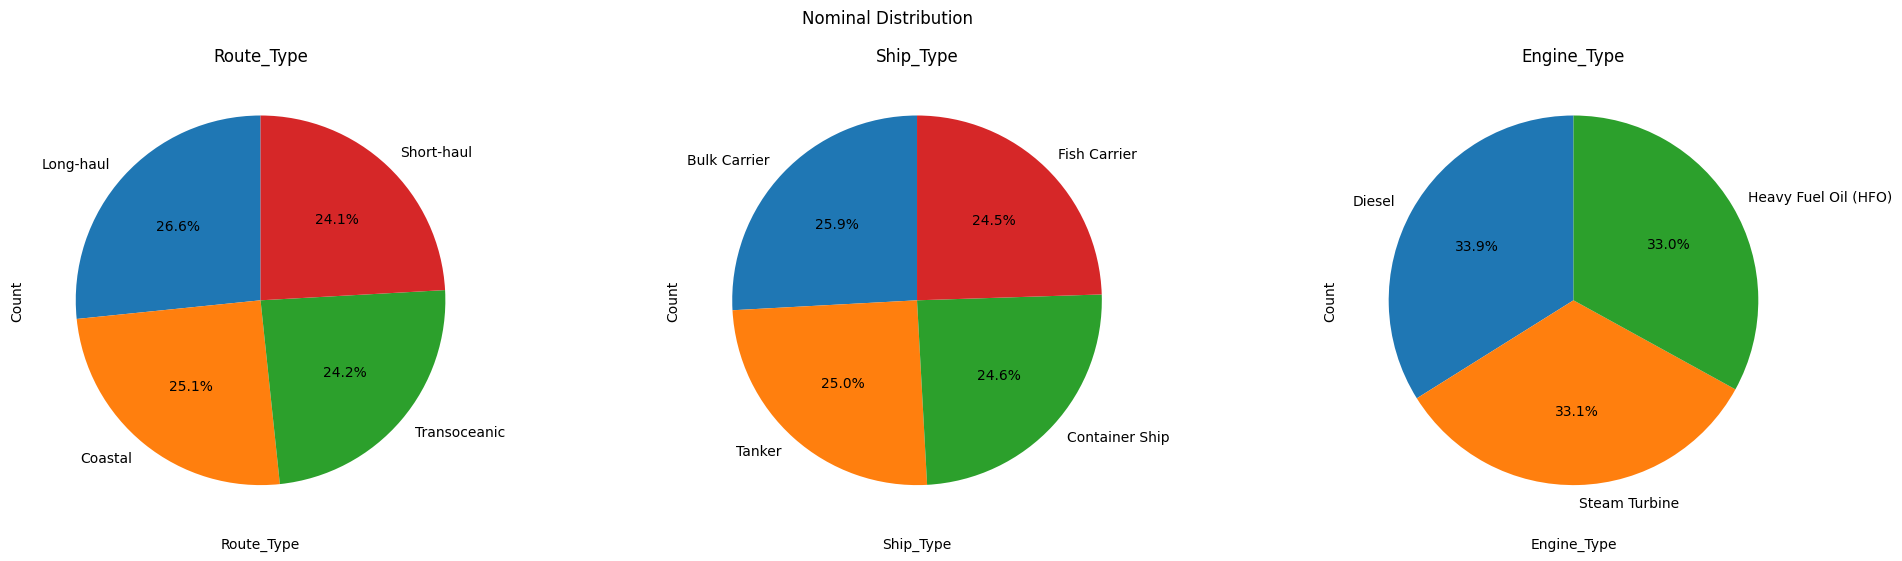

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

for i, feature in enumerate(nominal_features):
    ship_data = df[feature].value_counts()
    labels = ship_data.index.get_level_values(0)

    df[feature].value_counts().plot(kind='pie', labels=labels,
                                    autopct="%1.1f%%", startangle=90, ax=ax[i])
    ax[i].set_title(feature)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Count')

fig.suptitle('Nominal Distribution')
plt.show()

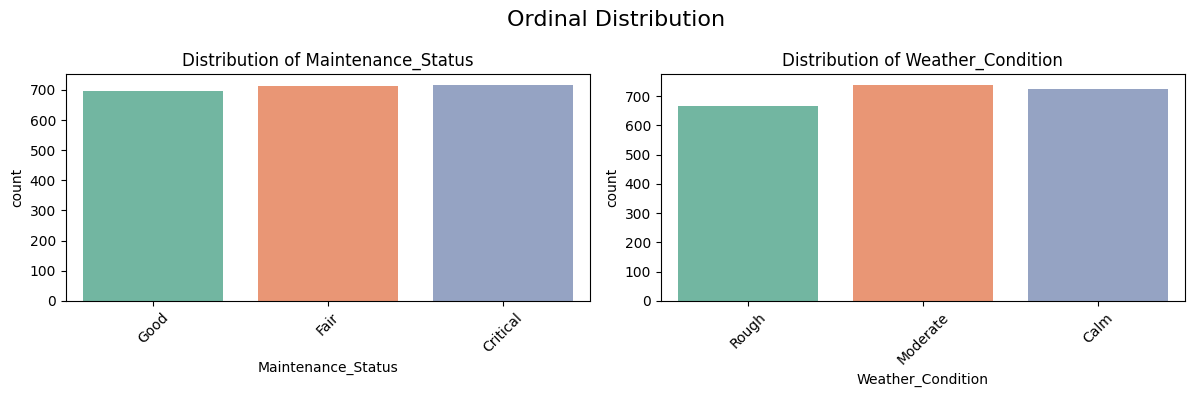

In [70]:
num_cols = len(ordinal_features)
rows = (num_cols // 3) + (num_cols % 3 > 0)
cols = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(ordinal_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, palette="Set2", hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.suptitle('Ordinal Distribution', fontsize=16, x=0.345)
plt.tight_layout()
plt.show()

Conclusion: both ordinal and nominal features are mostly **evenly distributed**.


### Numerical Features


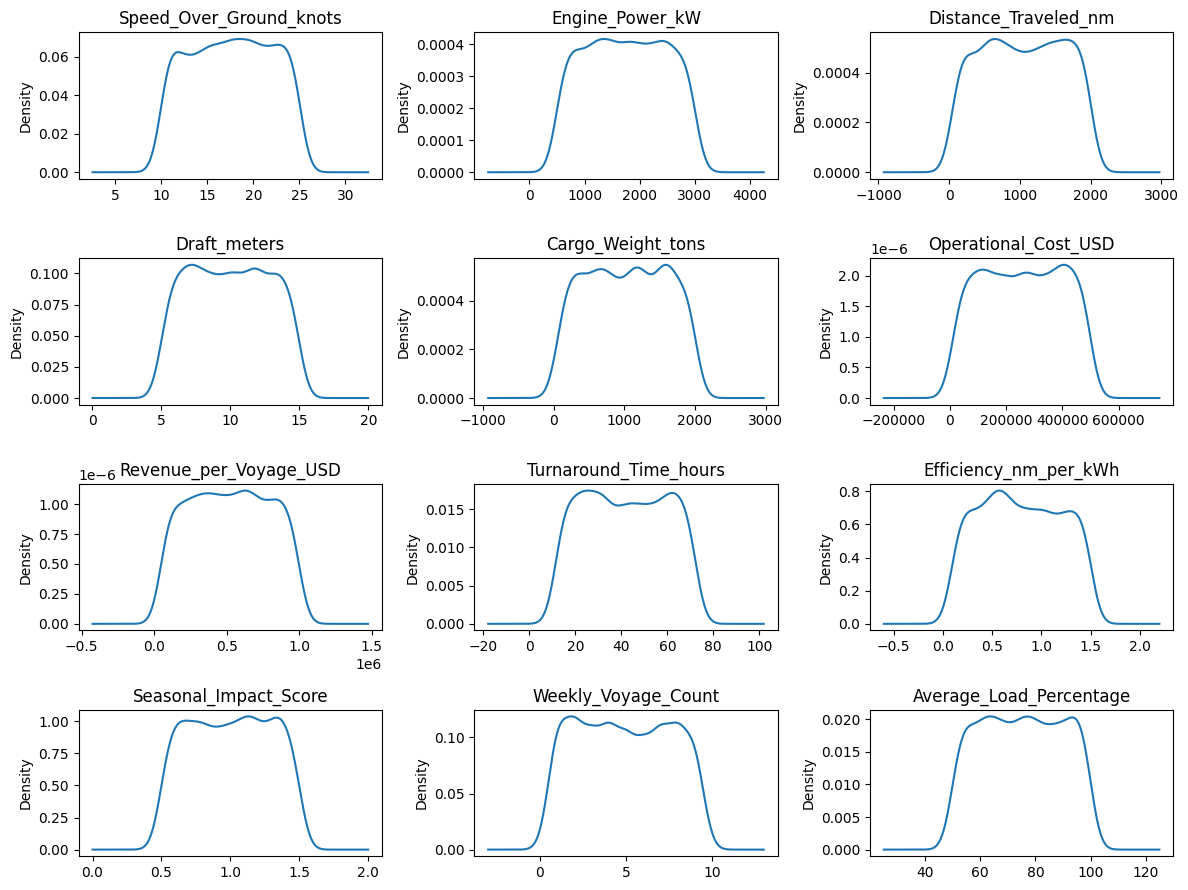

In [71]:
fig, ax = plt.subplots(4, 3, figsize=(12, 9))
axis = [axis for list_axis in ax for axis in list_axis]
for i, column in enumerate(numerical_features):
    df[column].plot(kind='kde', title=column, ax=axis[i])
    axis[i].set_title(column)
plt.tight_layout()
plt.show()

In [72]:
numerical_normality = pd.DataFrame(
    index=['1%', '2.5%', '5%', '10%', '15%'],
    columns=numerical_features
)

numerical_normality.loc[:, :] = df[numerical_features].apply(lambda x: (
    ~(sp.anderson(x)[0] > sp.anderson(x)[1][0]),
    ~(sp.anderson(x)[0] > sp.anderson(x)[1][1]),
    ~(sp.anderson(x)[0] > sp.anderson(x)[1][2]),
    ~(sp.anderson(x)[0] > sp.anderson(x)[1][3]),
    ~(sp.anderson(x)[0] > sp.anderson(x)[1][4])
)).values
numerical_normality

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1%,False,False,False,False,False,False,False,False,False,False,False,False
2.5%,False,False,False,False,False,False,False,False,False,False,False,False
5%,False,False,False,False,False,False,False,False,False,False,False,False
10%,False,False,False,False,False,False,False,False,False,False,False,False
15%,False,False,False,False,False,False,False,False,False,False,False,False


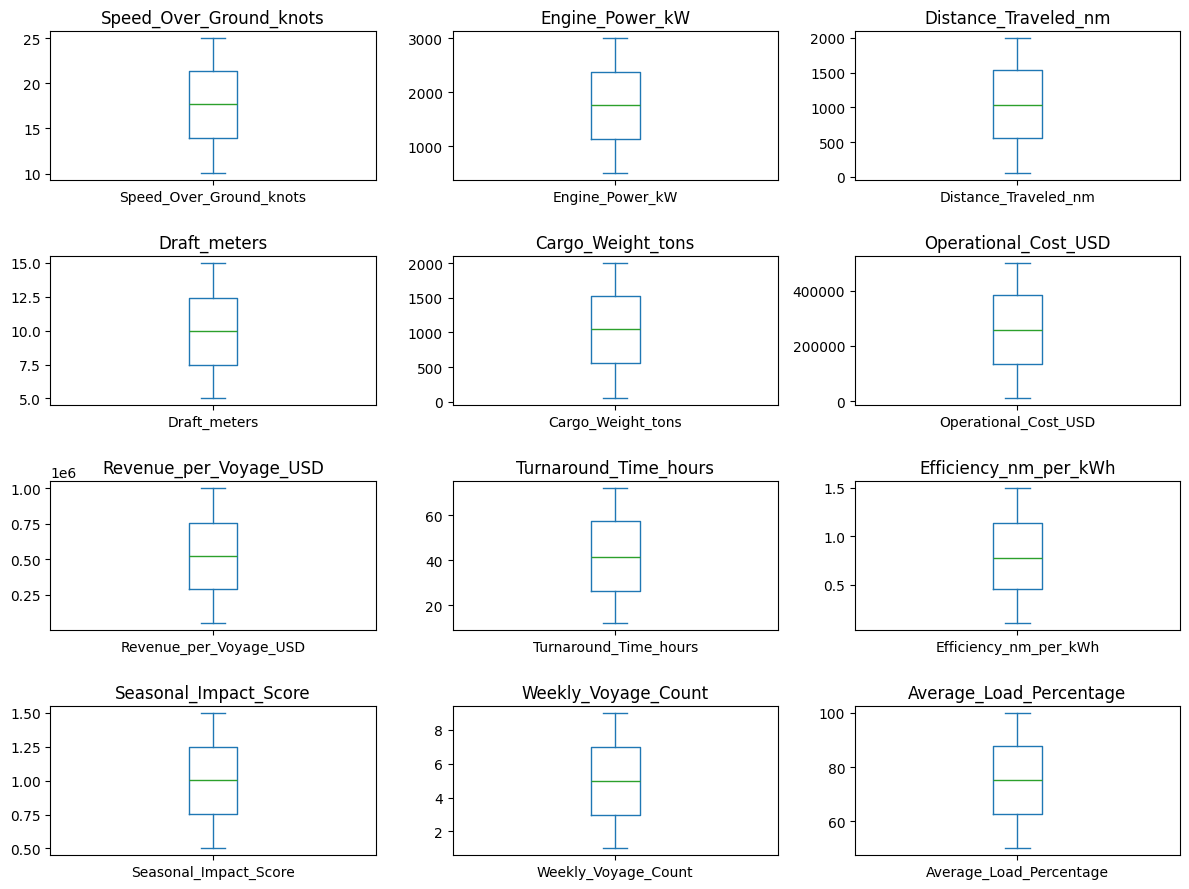

In [73]:
fig, ax = plt.subplots(4, 3, figsize=(12, 9))
axis = [axis for list_axis in ax for axis in list_axis]
for i, column in enumerate(numerical_features):
    df[column].plot(kind='box', title=column, ax=axis[i])
    axis[i].set_title(column)
plt.tight_layout()
plt.show()

Conclusion: no outliers, non-gaussian distributed, mostly spread near the centers.


## Bivariate Analysis


### Ordinal Features


In [74]:
ordinal_maps = {
    'Maintenance_Status': {
        'Critical': 0,
        'Fair': 1,
        'Good': 2
    },
    'Weather_Condition': {
        'Rough': 0,
        'Moderate': 1,
        'Calm': 2
    }
}

In [75]:
df = df.replace(ordinal_maps)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16336\1059744896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(ordinal_maps)


,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,2,10.387580,1796.057415,1060.486382,14.653083,0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),1,18.616196,2171.646567,723.304215,14.916320,0,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2127 non-null   object 
 1   Ship_Type                2127 non-null   object 
 2   Route_Type               2127 non-null   object 
 3   Engine_Type              2127 non-null   object 
 4   Maintenance_Status       2127 non-null   int64  
 5   Speed_Over_Ground_knots  2127 non-null   float64
 6   Engine_Power_kW          2127 non-null   float64
 7   Distance_Traveled_nm     2127 non-null   float64
 8   Draft_meters             2127 non-null   float64
 9   Weather_Condition        2127 non-null   int64  
 10  Cargo_Weight_tons        2127 non-null   float64
 11  Operational_Cost_USD     2127 non-null   float64
 12  Revenue_per_Voyage_USD   2127 non-null   float64
 13  Turnaround_Time_hours    2127 non-null   float64
 14  Efficiency_nm_per_kWh    2127

In [77]:
df[ordinal_features]

,Maintenance_Status,Weather_Condition
1,2,0
2,1,1
3,1,1
4,1,1
5,1,0
...,...,...
2729,2,1
2730,0,0
2731,2,1
2734,2,1


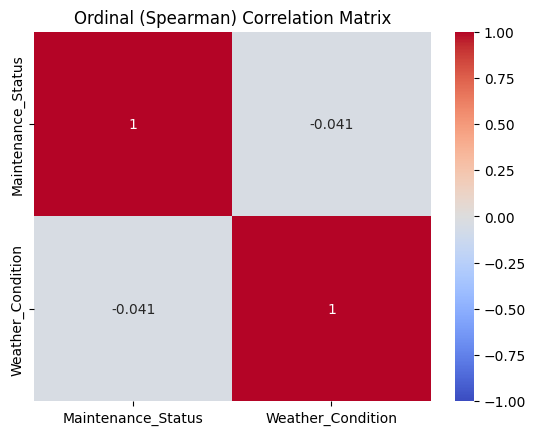

In [78]:
sns.heatmap(data=df[ordinal_features].corr(method='spearman'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.title('Ordinal (Spearman) Correlation Matrix')

plt.show()

Conclusion: maintenance status is not correlated with weather condition.


### Numerical Features


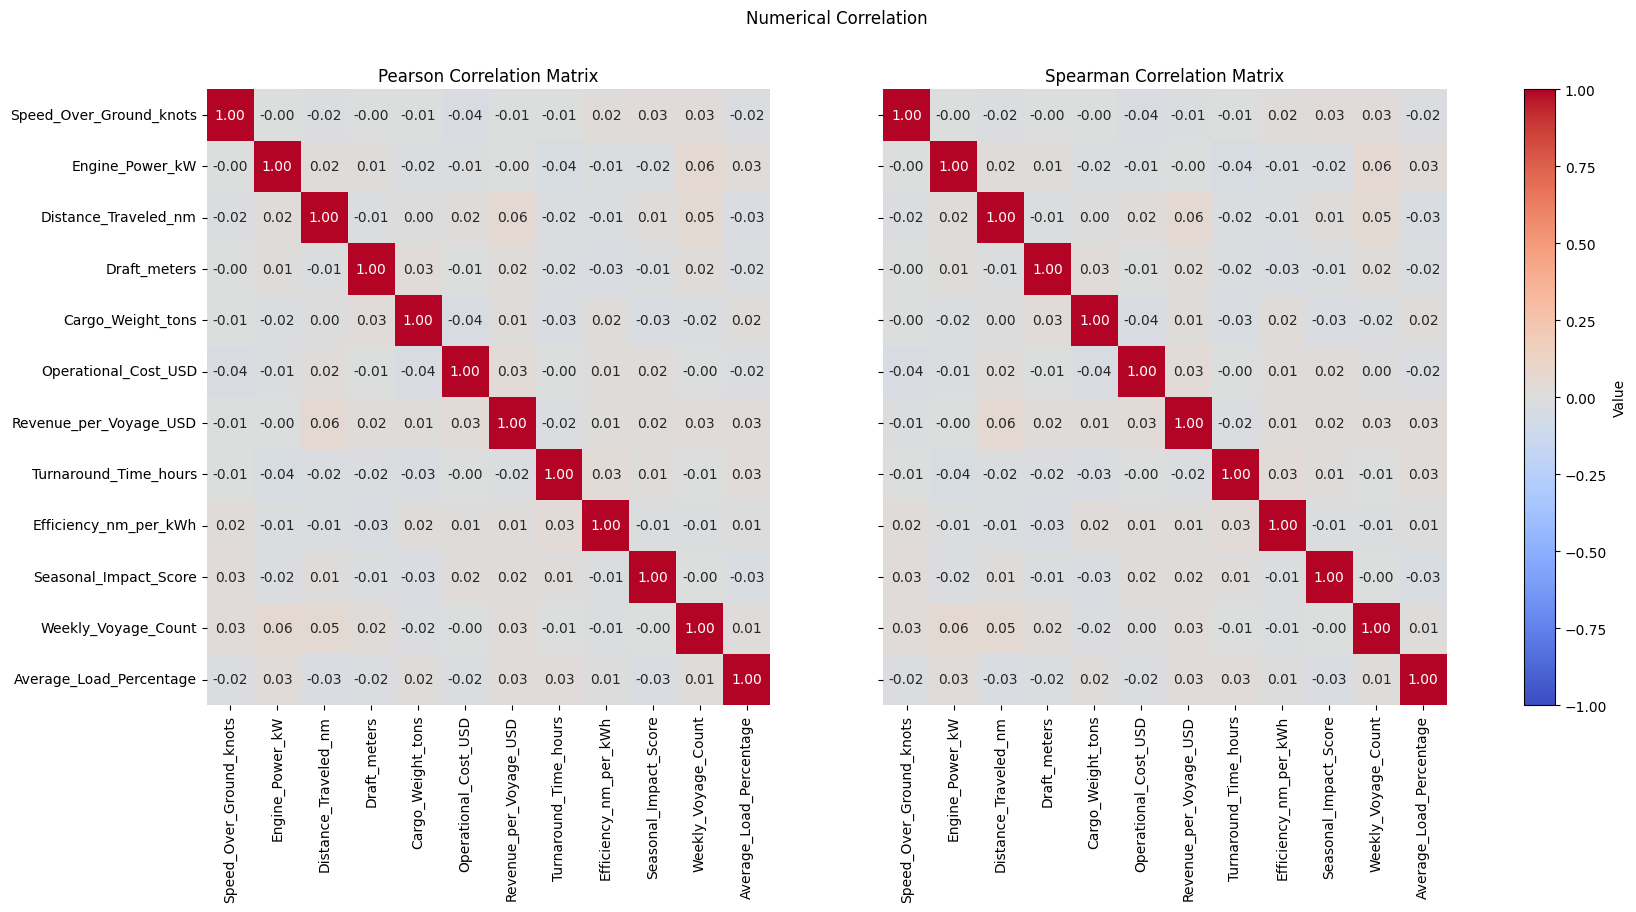

In [79]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 8))

sns.heatmap(data=df[numerical_features].corr(method='pearson'), annot=True,
            cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=False, ax=ax[0])
sns.heatmap(data=df[numerical_features].corr(method='spearman'), annot=True,
            cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=False, ax=ax[1])

ax[0].set_title('Pearson Correlation Matrix')
ax[1].set_title('Spearman Correlation Matrix')

cbar = fig.colorbar(ax[0].collections[0], ax=ax, orientation='vertical')
cbar.set_label('Value')

fig.suptitle('Numerical Correlation', x=0.44)
plt.show()

Conclusion: no correlation among numerical features.


### Numerical and Categorical Features


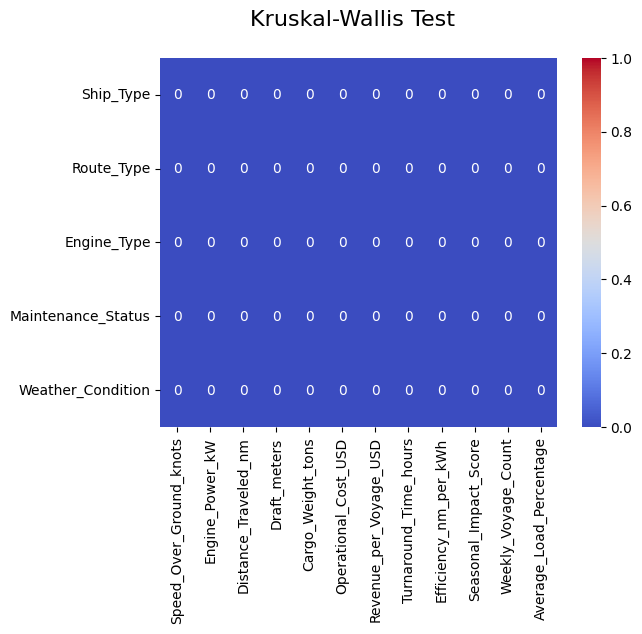

In [80]:
kruskal_p_values = pd.DataFrame(
    index=categorical_features,
    columns=numerical_features,
    dtype=np.float64
)

for index in kruskal_p_values.index:
    for col in kruskal_p_values.columns:
        group = []
        for category in df[index].unique():
            group.append(df.loc[df[index] == category, col].values)
        _, p_value = sp.kruskal(*group)
        kruskal_p_values.loc[index, col] = p_value

rejected, _, _, _ = multipletests(
    kruskal_p_values.values.flatten(), alpha=0.01, method='fdr_bh'
)

kruskal_p_values.loc[:, :] = rejected.reshape(
    kruskal_p_values.shape).astype(float)

sns.heatmap(data=kruskal_p_values, cmap='coolwarm',
            annot=True, vmin=0, vmax=1, cbar=True)
plt.suptitle('Kruskal-Wallis Test', x=0.425, fontsize=16)
plt.show()

Conclusion: no statiscally significant relationship between categorical and numerical features.


## Conclusions


- Both ordinal and nominal features are mostly **evenly distributed**.
- No outliers, non-gaussian distributed, mostly spread near the centers (numerical features).
- Maintenance status is not correlated with weather condition.
- No correlation among numerical features.
- No statiscally significant relationship between categorical and numerical features.


# **5. Data Preprocessing**


In [81]:
min_max_scaler = MinMaxScaler()

df_normalized = df[numerical_features].copy()
df_normalized = df_normalized.astype(float)
df_normalized.loc[:, :] = min_max_scaler.fit_transform(df_normalized)

In [82]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Speed_Over_Ground_knots  2127 non-null   float64
 1   Engine_Power_kW          2127 non-null   float64
 2   Distance_Traveled_nm     2127 non-null   float64
 3   Draft_meters             2127 non-null   float64
 4   Cargo_Weight_tons        2127 non-null   float64
 5   Operational_Cost_USD     2127 non-null   float64
 6   Revenue_per_Voyage_USD   2127 non-null   float64
 7   Turnaround_Time_hours    2127 non-null   float64
 8   Efficiency_nm_per_kWh    2127 non-null   float64
 9   Seasonal_Impact_Score    2127 non-null   float64
 10  Weekly_Voyage_Count      2127 non-null   float64
 11  Average_Load_Percentage  2127 non-null   float64
dtypes: float64(12)
memory usage: 216.0 KB


In [83]:
df_categorical = pd.concat(
    [df[ordinal_features], df[nominal_features]], axis=1)

df_categorical

,Maintenance_Status,Weather_Condition,Route_Type,Ship_Type,Engine_Type
1,2,0,Short-haul,Fish Carrier,Steam Turbine
2,1,1,Long-haul,Container Ship,Diesel
3,1,1,Transoceanic,Bulk Carrier,Steam Turbine
4,1,1,Transoceanic,Fish Carrier,Diesel
5,1,0,Long-haul,Fish Carrier,Heavy Fuel Oil (HFO)
...,...,...,...,...,...
2729,2,1,Long-haul,Container Ship,Heavy Fuel Oil (HFO)
2730,0,0,Long-haul,Tanker,Diesel
2731,2,1,Short-haul,Tanker,Heavy Fuel Oil (HFO)
2734,2,1,Transoceanic,Tanker,Heavy Fuel Oil (HFO)


In [84]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Maintenance_Status  2127 non-null   int64 
 1   Weather_Condition   2127 non-null   int64 
 2   Route_Type          2127 non-null   object
 3   Ship_Type           2127 non-null   object
 4   Engine_Type         2127 non-null   object
dtypes: int64(2), object(3)
memory usage: 99.7+ KB


In [85]:
df_processed = pd.concat([df_categorical, df_normalized], axis=1)

df_processed.head()

,Maintenance_Status,Weather_Condition,Route_Type,Ship_Type,Engine_Type,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2,0,Short-haul,Fish Carrier,Steam Turbine,0.025219,0.518350,0.518533,0.966277,0.057553,0.966614,0.877777,0.854481,0.136018,0.385945,0.625,0.878718
2,1,1,Long-haul,Container Ship,Diesel,0.716864,0.459279,0.312357,0.219996,0.065581,0.895450,0.361960,0.623798,0.285686,0.906517,1.000,0.925231
3,1,1,Transoceanic,Bulk Carrier,Steam Turbine,0.737246,0.165608,0.552589,0.679530,0.865698,0.513139,0.039180,0.173291,0.431118,0.871380,0.000,0.324021
4,1,1,Transoceanic,Fish Carrier,Diesel,0.249169,0.235476,0.716076,0.473158,0.107941,0.566993,0.659079,0.869660,0.880651,0.083444,0.875,0.600650
5,1,0,Long-haul,Fish Carrier,Heavy Fuel Oil (HFO),0.574456,0.668767,0.345433,0.992633,0.955556,0.356328,0.765010,0.591406,0.908450,0.938453,0.750,0.063334


# **6. Clustering Model Development**


## **a. Modelling**


In [86]:
init = 'k-means++'
n_init = 10
max_iter = 1000
random_state = 42
batch_size = 6
targeted_clusters = 2
n_jobs = -1

In [87]:
# Define algorithm configurations.
# (Assumes that batch_size, random_state, init, n_init, and max_iter are defined globally.)
dict_algorithms = {
    "Mini Batch KMeans": {
        "model": MiniBatchKMeans,
        "params": {
            "batch_size": batch_size,
            "random_state": random_state,
            "init": init,
            "n_init": n_init,
            "max_iter": max_iter
        }
    },
    "Bisecting KMeans": {
        "model": BisectingKMeans,
        "params": {
            "random_state": random_state,
            "init": init,
            "n_init": n_init,
            "max_iter": max_iter
        }
    },
    "Spectral KMeans (RBF)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "n_jobs": n_jobs
        }
    },
    "Spectral QR (RBF)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "n_jobs": n_jobs
        }
    },
    "Spectral KMeans (Linear)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "kmeans",
            "affinity": "linear",
            "n_jobs": n_jobs
        }
    },
    "Spectral QR (Linear)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "linear",
            "n_jobs": n_jobs
        }
    },
    "Spectral KMeans (Poly - 2)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "kmeans",
            "affinity": "poly",
            "degree": 2,
            "n_jobs": n_jobs
        }
    },
    "Spectral QR (Poly - 2)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "poly",
            "degree": 2,
            "n_jobs": n_jobs
        }
    },
    "Spectral KMeans (Poly - 3)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "kmeans",
            "affinity": "poly",
            "degree": 3,
            "n_jobs": n_jobs
        }
    },
    "Spectral QR (Poly - 3)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "poly",
            "degree": 3,
            "n_jobs": n_jobs
        }
    },
    "Spectral KMeans (Poly - 4)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "kmeans",
            "affinity": "poly",
            "degree": 4,
            "n_jobs": n_jobs
        }
    },
    "Spectral QR (Poly - 4)": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "poly",
            "degree": 4,
            "n_jobs": n_jobs
        }
    },
    "Spectral RBF": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "rbf",
            "n_jobs": n_jobs
        }
    },
    "Spectral Laplacian": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "laplacian",
            "n_jobs": n_jobs
        }
    },
    "Spectral Sigmoid": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "sigmoid",
            "n_jobs": n_jobs
        }
    },
    "Spectral Cosine": {
        "model": SpectralClustering,
        "params": {
            "random_state": random_state,
            "n_init": n_init,
            "assign_labels": "cluster_qr",
            "affinity": "cosine",
            "n_jobs": n_jobs
        }
    },
    "Agglomerative (Ward)": {
        "model": AgglomerativeClustering,
        "params": {
            "linkage": "ward"
        }
    },
    "Agglomerative (Average)": {
        "model": AgglomerativeClustering,
        "params": {
            "linkage": "average"
        }
    },
    "Agglomerative (Complete)": {
        "model": AgglomerativeClustering,
        "params": {
            "linkage": "complete"
        }
    },
    "Agglomerative (Single)": {
        "model": AgglomerativeClustering,
        "params": {
            "linkage": "single"
        }
    }
}

In [88]:
df_processed

,Maintenance_Status,Weather_Condition,Route_Type,Ship_Type,Engine_Type,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,2,0,Short-haul,Fish Carrier,Steam Turbine,0.025219,0.518350,0.518533,0.966277,0.057553,0.966614,0.877777,0.854481,0.136018,0.385945,0.625,0.878718
2,1,1,Long-haul,Container Ship,Diesel,0.716864,0.459279,0.312357,0.219996,0.065581,0.895450,0.361960,0.623798,0.285686,0.906517,1.000,0.925231
3,1,1,Transoceanic,Bulk Carrier,Steam Turbine,0.737246,0.165608,0.552589,0.679530,0.865698,0.513139,0.039180,0.173291,0.431118,0.871380,0.000,0.324021
4,1,1,Transoceanic,Fish Carrier,Diesel,0.249169,0.235476,0.716076,0.473158,0.107941,0.566993,0.659079,0.869660,0.880651,0.083444,0.875,0.600650
5,1,0,Long-haul,Fish Carrier,Heavy Fuel Oil (HFO),0.574456,0.668767,0.345433,0.992633,0.955556,0.356328,0.765010,0.591406,0.908450,0.938453,0.750,0.063334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,2,1,Long-haul,Container Ship,Heavy Fuel Oil (HFO),0.950990,0.525326,0.050070,0.538327,0.718330,0.523370,0.811303,0.373858,0.434885,0.853635,0.750,0.024964
2730,0,0,Long-haul,Tanker,Diesel,0.376418,0.464834,0.577805,0.757122,0.205984,0.783703,0.544452,0.171164,0.182992,0.579627,0.125,0.859326
2731,2,1,Short-haul,Tanker,Heavy Fuel Oil (HFO),0.106678,0.967826,0.097313,0.870945,0.137453,0.465401,0.717495,0.586004,0.643824,0.785504,0.250,0.496616
2734,2,1,Transoceanic,Tanker,Heavy Fuel Oil (HFO),0.875916,0.611297,0.292008,0.162386,0.052959,0.030929,0.789251,0.038624,0.569005,0.403271,0.125,0.857858


In [89]:
df_processed.columns

Index(['Maintenance_Status', 'Weather_Condition', 'Route_Type', 'Ship_Type',
       'Engine_Type', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [90]:
list(df_processed.columns).index('Speed_Over_Ground_knots')

5

In [91]:
ica = FastICA(n_components=2, random_state=42)
ica_results = ica.fit_transform(df_processed[df_processed.columns[5::]])
df_processed.loc[:, 'ICA Component 0'] = ica_results[:, 0]
df_processed.loc[:, 'ICA Component 1'] = ica_results[:, 1]

selected_features = ['ICA Component 0', 'ICA Component 1']

cluster_sizes = np.arange(2, 41)
xticks = [5, 10, 15, 20, 25, 30, 35, 40]

## **b. Model Evaluation**


**Clustering Performance Metrics**

1. **_Silhouette Score_**

   Measures how similar an object is to its own cluster compared to other clusters. A **higher** score is better, indicating that clusters are more compact and well-separated from each other.

2. **_Calinski-Harabasz Score_**

   Measures similarity between-cluster and within-cluster differences. A **higher** score is better, as it indicates that the distance between clusters is significantly larger than the variance within each cluster.

3. **_Davies-Bouldin Score_**

   Measures how well-separated clusters are based on the ratio of within-cluster scatter to between-cluster separation. A **lower** score is better, indicating that clusters are well-separated and have minimal overlap.


In [ ]:
def get_scores(model, data):
    model.fit(data)
    labels = model.labels_
    return {
        'silhouette': silhouette_score(data, labels),
        'calinski': calinski_harabasz_score(data, labels),
        'davies': davies_bouldin_score(data, labels)
    }


def run_experiments(data, features, cluster_sizes, algorithms, dict_algorithms=dict_algorithms):
    """
    Run clustering experiments over a range of cluster sizes for different algorithms.
    """
    results = {}
    for name in algorithms:
        alg = dict_algorithms[name]
        results[name] = {'silhouette': [], 'calinski': [], 'davies': []}
        for n_clusters in cluster_sizes:
            params = alg['params'].copy()
            params['n_clusters'] = n_clusters
            model = alg['model'](**params)
            scores = get_scores(model, data[features])
            for metric in scores:
                results[name][metric].append(scores[metric])
        print(f"{name} algorithm done.")
    return results


def plot_results(cluster_sizes, xticks, results, suptitle, figsize, leg_loc='top'):
    """
    Plot the clustering performance metrics in two rows
    """
    position_title = 0.5
    rect = 0
    # Define which algorithms go on the first row vs. second row
    metrics = ['silhouette', 'calinski', 'davies']

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    # Just to be explicit about indexing as [row, col]
    axes = axes.reshape(1, 3)

    for col_idx, metric in enumerate(metrics):
        for name in results:
            axes[0, col_idx].plot(
                cluster_sizes, results[name][metric], label=name)
        axes[0, col_idx].set_title(f"{metric.capitalize()} Score")
        axes[0, col_idx].set_xticks(xticks)

    axes[0, 1].set_xlabel("Number of Clusters")
    axes[0, 0].set_ylabel(f"Score")

    handles, labels = axes[0, -1].get_legend_handles_labels()
    if leg_loc == 'top':
        fig.legend(
            handles,
            labels,
            loc='upper center',
            ncol=4,
            # Adjust this as needed to position below the title
            bbox_to_anchor=(0.5, 0.93)
        )
        rect = [0, 0, 1, 0.95]
    else:
        axes[0, -1].legend(handles, labels, loc='center left',
                           bbox_to_anchor=(1, 0.5))
        position_title = 0.43
        rect = [0, 0, 1, 1]

    fig.suptitle(suptitle, fontsize=16, x=position_title)
    plt.tight_layout(rect=rect)
    plt.show()

### **Numerical Features**


In [93]:
reduced_features = ['ICA Component 0', 'ICA Component 1']

In [94]:
first_results = run_experiments(
    df_processed,
    reduced_features,
    cluster_sizes,
    algorithms=['Mini Batch KMeans', 'Bisecting KMeans']
)

Mini Batch KMeans algorithm done.
Bisecting KMeans algorithm done.


In [95]:
second_results = run_experiments(
    df_processed,
    reduced_features,
    cluster_sizes,
    algorithms=[
        "Spectral RBF",
        "Spectral Laplacian"
    ]
)

Spectral RBF algorithm done.
Spectral Laplacian algorithm done.


In [96]:
third_results = run_experiments(
    df_processed,
    reduced_features,
    cluster_sizes,
    algorithms=[
        "Agglomerative (Ward)",
        "Agglomerative (Average)",
        "Agglomerative (Complete)",
        "Agglomerative (Single)"
    ]
)

Agglomerative (Ward) algorithm done.
Agglomerative (Average) algorithm done.
Agglomerative (Complete) algorithm done.
Agglomerative (Single) algorithm done.


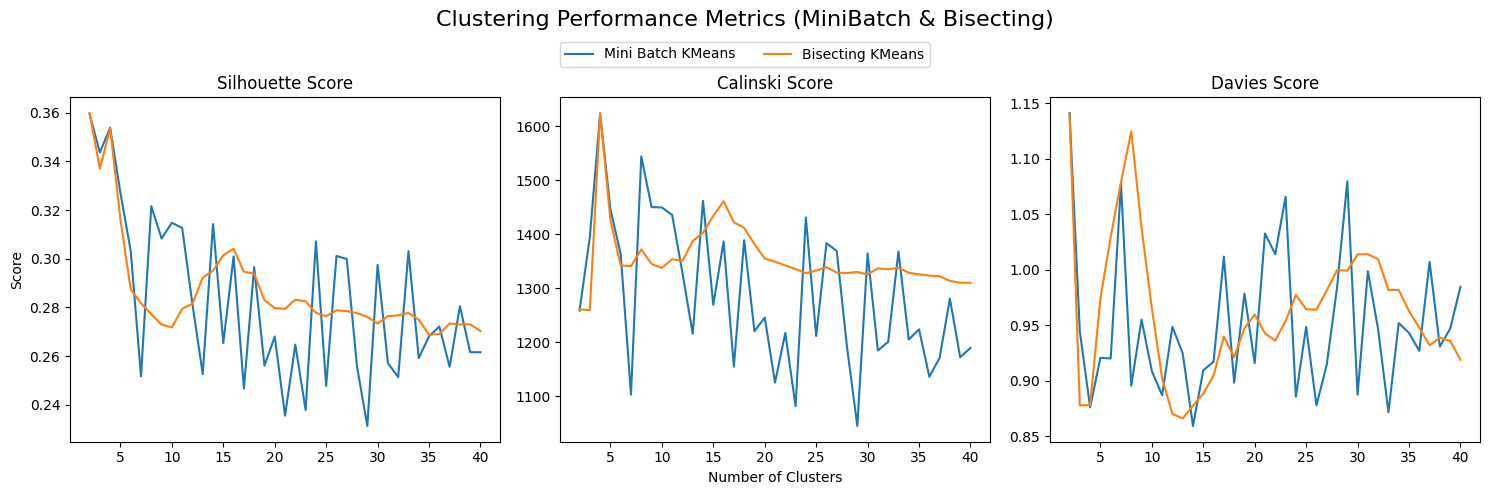

In [97]:
plot_results(cluster_sizes, xticks, first_results,
             "Clustering Performance Metrics (MiniBatch & Bisecting)", (15, 5), 'top')

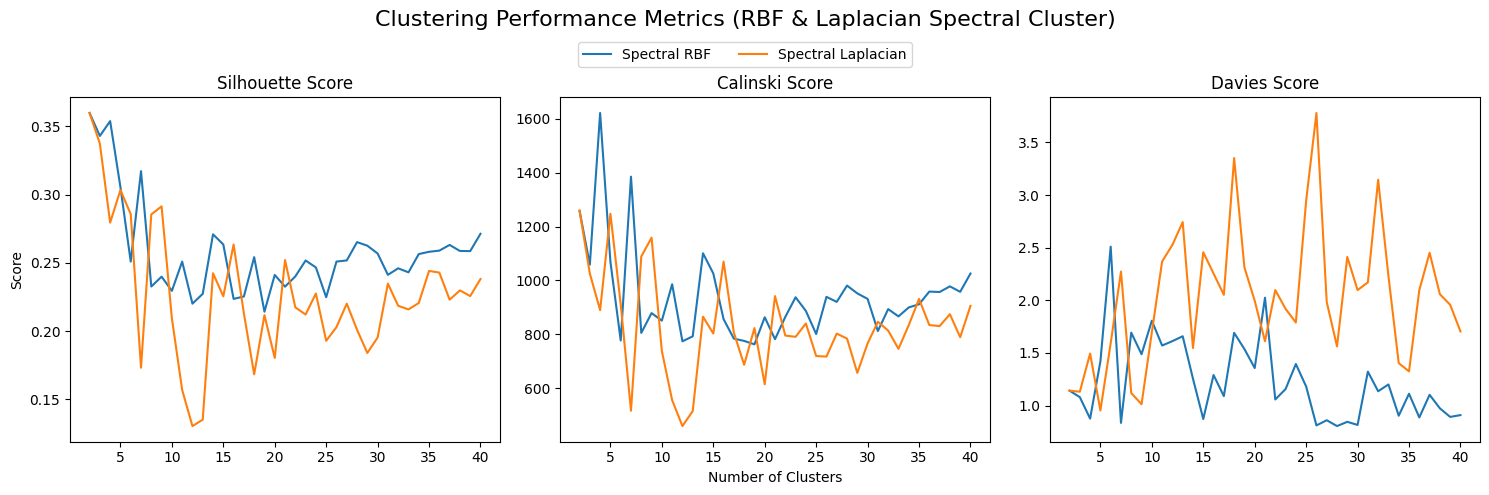

In [98]:
plot_results(cluster_sizes, xticks, second_results,
             "Clustering Performance Metrics (RBF & Laplacian Spectral Cluster)", (15, 5), 'top')

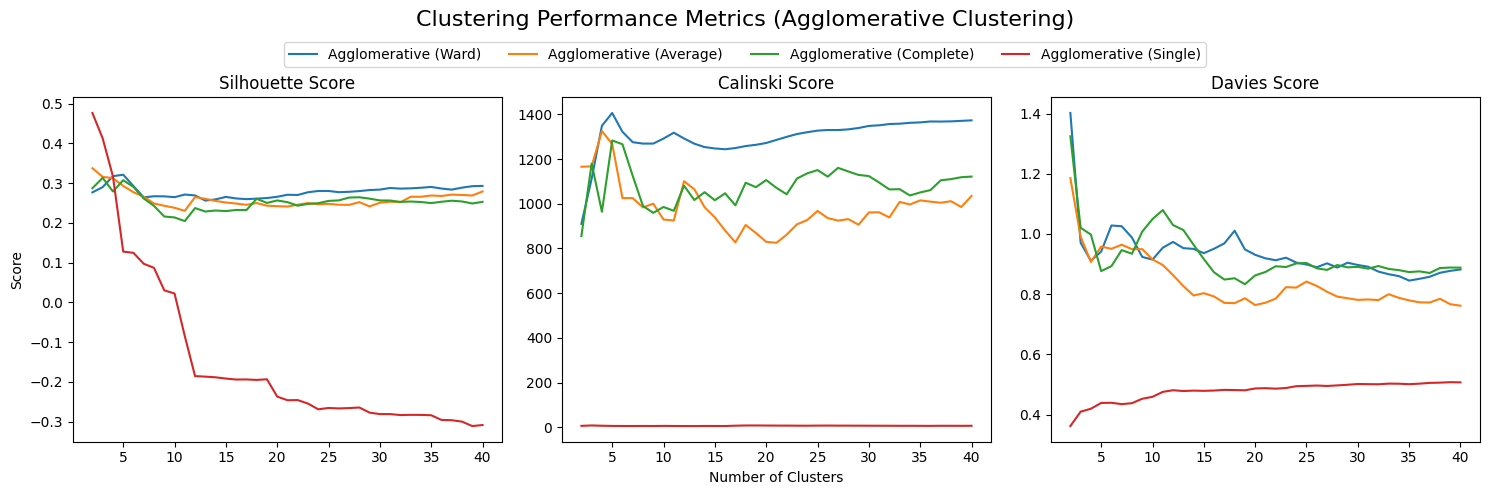

In [99]:
plot_results(cluster_sizes, xticks, third_results,
             "Clustering Performance Metrics (Agglomerative Clustering)", (15, 5), 'top')

In [100]:
results = [
    (first_results, ['Mini Batch KMeans', 'Bisecting KMeans']),
    (second_results, ['Spectral RBF', 'Spectral Laplacian']),
    (third_results, ['Agglomerative (Ward)', 'Agglomerative (Average)',
                     'Agglomerative (Complete)', 'Agglomerative (Single)'])
]

In [101]:
print("Silhouette:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmax(np.array(result[algo]['silhouette']))
        print(f"{algo}: {cluster_sizes[n]}")
print("\n")

print("Calinski-Harabasz:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmax(np.array(result[algo]['calinski']))
        print(f"{algo}: {cluster_sizes[n]}")
print("\n")

print("Davies-Bouldin:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmin(np.array(result[algo]['davies']))
        print(f"{algo}: {cluster_sizes[n]}")

Silhouette:
Mini Batch KMeans: 2
Bisecting KMeans: 2
Spectral RBF: 2
Spectral Laplacian: 2
Agglomerative (Ward): 5
Agglomerative (Average): 2
Agglomerative (Complete): 3
Agglomerative (Single): 2


Calinski-Harabasz:
Mini Batch KMeans: 4
Bisecting KMeans: 4
Spectral RBF: 4
Spectral Laplacian: 2
Agglomerative (Ward): 5
Agglomerative (Average): 4
Agglomerative (Complete): 5
Agglomerative (Single): 3


Davies-Bouldin:
Mini Batch KMeans: 14
Bisecting KMeans: 13
Spectral RBF: 28
Spectral Laplacian: 5
Agglomerative (Ward): 35
Agglomerative (Average): 40
Agglomerative (Complete): 19
Agglomerative (Single): 2


Looking at the trends of Agglomerative algorithms, we can ignore all of them because of their stangnating performance. We also observe that there is a range of values where silhouette are more-or-less balanced, which is between 2 and 5 clusters.


In [102]:
for result in [first_results, second_results]:
    for model in result.keys():
        print(f"{model} model")
        for cluster in range(2, 6):
            print(f"{cluster} clusters")
            for metric in result[model].keys():
                print(f"{metric}: {result[model][metric][cluster-2]}")
        print("\n")

Mini Batch KMeans model
2 clusters
silhouette: 0.3593798296028788
calinski: 1258.4056026841076
davies: 1.1412994343186162
3 clusters
silhouette: 0.343648367455351
calinski: 1394.658160580997
davies: 0.9445751777180768
4 clusters
silhouette: 0.3538652868333606
calinski: 1622.6138693073788
davies: 0.8759954090927149
5 clusters
silhouette: 0.32699492081864584
calinski: 1446.2081522939839
davies: 0.9206938240658008


Bisecting KMeans model
2 clusters
silhouette: 0.35986877804742906
calinski: 1260.6331707222696
davies: 1.1406517963696494
3 clusters
silhouette: 0.336969323569592
calinski: 1259.2075487805132
davies: 0.8778553621325308
4 clusters
silhouette: 0.35357408392199147
calinski: 1624.2330165338071
davies: 0.8780459016259303
5 clusters
silhouette: 0.3161191959662624
calinski: 1425.9094132409446
davies: 0.9742282388382254


Spectral RBF model
2 clusters
silhouette: 0.35988152761719283
calinski: 1258.2701121037355
davies: 1.1416147898773763
3 clusters
silhouette: 0.34306929549829
calinsk

**Therefore, we conclude that 3 clusters is the best number.**

Let's take a look at the resulting clusters.


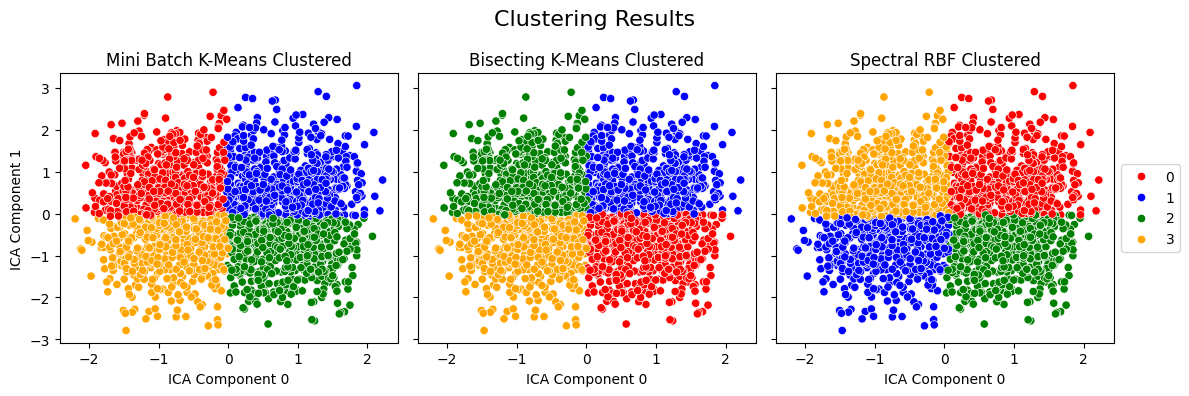

In [103]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

data = df_processed[['ICA Component 0', 'ICA Component 1']]
minibatch_model = MiniBatchKMeans(n_clusters=4, random_state=random_state,
                                  init=init, n_init=n_init, max_iter=max_iter, batch_size=batch_size).fit(data)
bisecting_model = BisectingKMeans(
    n_clusters=4, random_state=random_state, init=init, n_init=n_init, max_iter=max_iter).fit(data)
spectral_rbf = SpectralClustering(n_clusters=4, random_state=random_state,
                                  assign_labels='cluster_qr', affinity='rbf', n_jobs=n_jobs).fit(data)

df_processed['minibatch_numerical_labels'] = minibatch_model.labels_
df_processed['bisecting_numerical_labels'] = bisecting_model.labels_
df_processed['spectral_rbf_numerical_labels'] = spectral_rbf.labels_

palette = ['red', 'blue', 'green', 'orange']

sns.scatterplot(data=df_processed, x='ICA Component 0', y='ICA Component 1',
                palette=palette, hue='minibatch_numerical_labels', legend=False, ax=ax[0])
sns.scatterplot(data=df_processed, x='ICA Component 0', y='ICA Component 1',
                palette=palette, hue='bisecting_numerical_labels', legend=False, ax=ax[1])
sns.scatterplot(data=df_processed, x='ICA Component 0', y='ICA Component 1',
                palette=palette, hue='spectral_rbf_numerical_labels', ax=ax[2])

ax[0].set_title('Mini Batch K-Means Clustered')
ax[1].set_title('Bisecting K-Means Clustered')
ax[2].set_title('Spectral RBF Clustered')

handles, labels = ax[-1].get_legend_handles_labels()
ax[-1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
position_title = 0.43

fig.suptitle('Clustering Results', fontsize=16)
plt.tight_layout()
plt.show()

Based on the clustering evaluation results, **Bisecting KMeans** have the slight advantage, since the lines are clearly cutting the cloud.


### **Ordinal Features**


In [104]:
ordinal_processed = df_processed.columns[0:2]
ordinal_processed

Index(['Maintenance_Status', 'Weather_Condition'], dtype='object')

In [105]:
first_results = run_experiments(
    df_processed,
    ordinal_processed,
    cluster_sizes,
    algorithms=['Mini Batch KMeans', 'Bisecting KMeans']
)

Mini Batch KMeans algorithm done.
Bisecting KMeans algorithm done.


In [106]:
second_results = run_experiments(
    df_processed,
    ordinal_processed,
    cluster_sizes,
    algorithms=[
        "Spectral RBF"
    ]
)

Spectral RBF algorithm done.


In [107]:
third_results = run_experiments(
    df_processed,
    ordinal_processed,
    cluster_sizes,
    algorithms=[
        "Agglomerative (Ward)",
        "Agglomerative (Average)",
        "Agglomerative (Complete)",
        "Agglomerative (Single)"
    ]
)

Agglomerative (Ward) algorithm done.
Agglomerative (Average) algorithm done.
Agglomerative (Complete) algorithm done.
Agglomerative (Single) algorithm done.


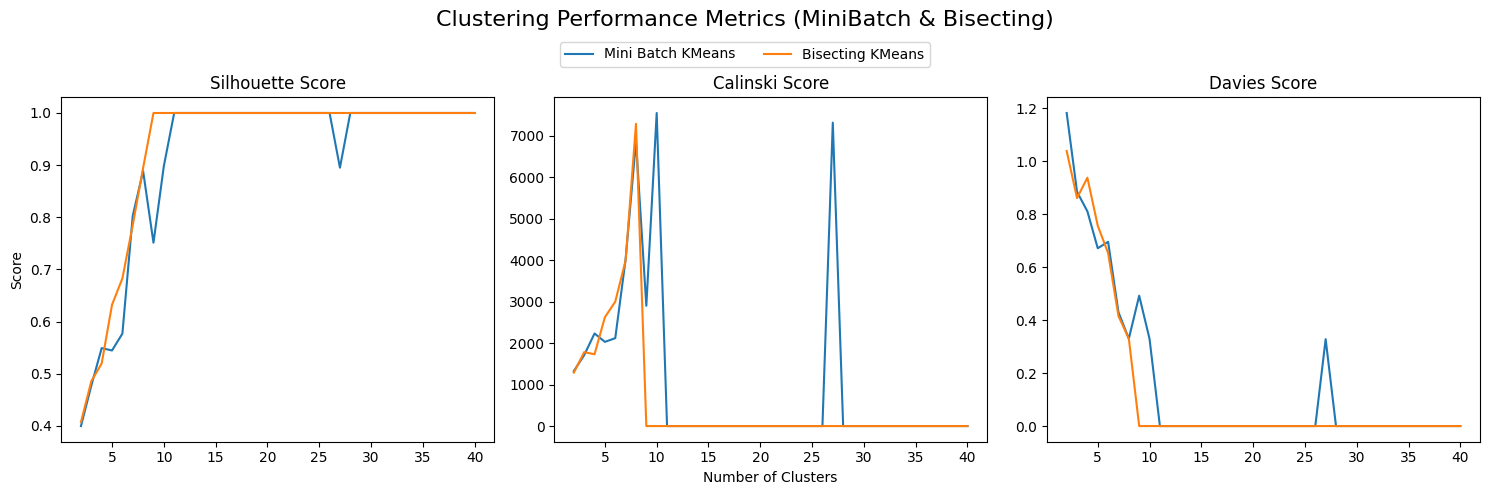

In [108]:
plot_results(cluster_sizes, xticks, first_results,
             "Clustering Performance Metrics (MiniBatch & Bisecting)", (15, 5), 'top')

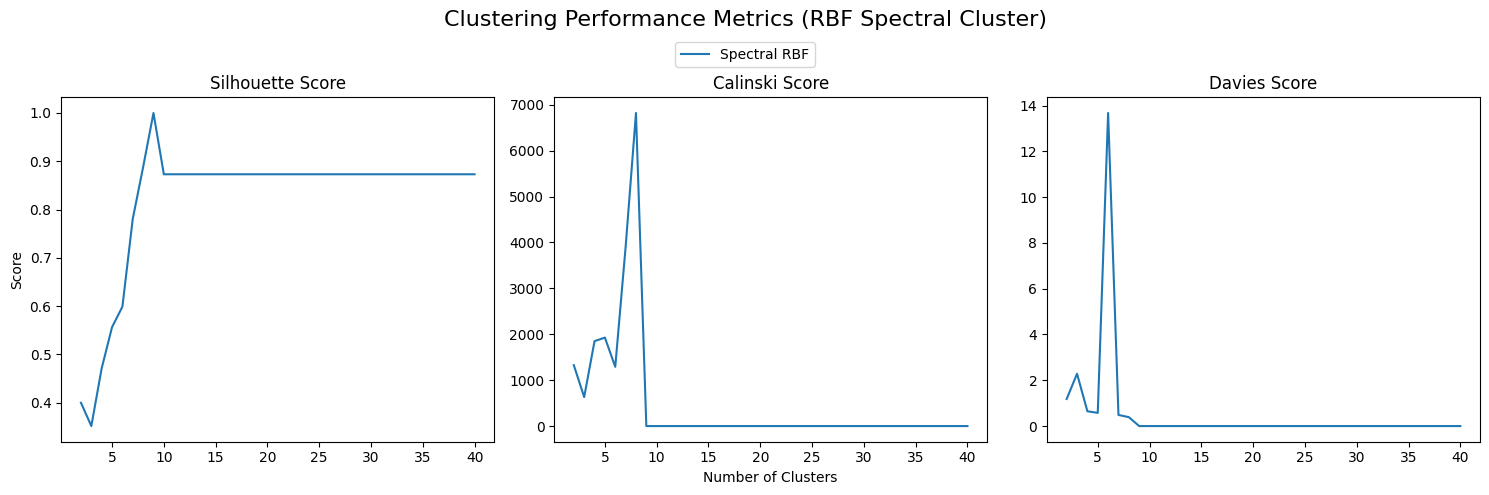

In [109]:
plot_results(cluster_sizes, xticks, second_results,
             "Clustering Performance Metrics (RBF Spectral Cluster)", (15, 5), 'top')

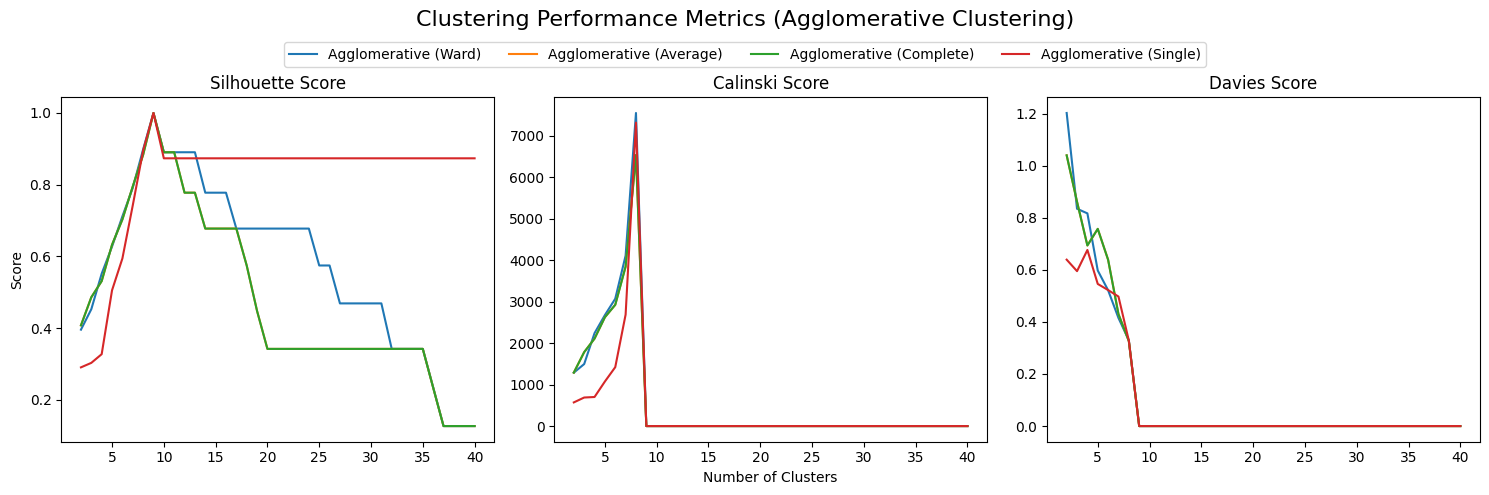

In [110]:
plot_results(cluster_sizes, xticks, third_results,
             "Clustering Performance Metrics (Agglomerative Clustering)", (15, 5), 'top')

In [111]:
results = [
    (first_results, ['Mini Batch KMeans', 'Bisecting KMeans']),
    (second_results, ['Spectral RBF']),
    (third_results, ['Agglomerative (Ward)', 'Agglomerative (Average)',
                     'Agglomerative (Complete)', 'Agglomerative (Single)'])
]

In [112]:
print("Silhouette:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmax(np.array(result[algo]['silhouette']))
        print(f"{algo}: {cluster_sizes[n]}")
print("\n")

print("Calinski-Harabasz:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmax(np.array(result[algo]['calinski']))
        print(f"{algo}: {cluster_sizes[n]}")
print("\n")

print("Davies-Bouldin:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.argmin(np.array(result[algo]['davies']))
        print(f"{algo}: {cluster_sizes[n]}")

Silhouette:
Mini Batch KMeans: 11
Bisecting KMeans: 9
Spectral RBF: 9
Agglomerative (Ward): 9
Agglomerative (Average): 9
Agglomerative (Complete): 9
Agglomerative (Single): 9


Calinski-Harabasz:
Mini Batch KMeans: 10
Bisecting KMeans: 8
Spectral RBF: 8
Agglomerative (Ward): 8
Agglomerative (Average): 8
Agglomerative (Complete): 8
Agglomerative (Single): 8


Davies-Bouldin:
Mini Batch KMeans: 11
Bisecting KMeans: 9
Spectral RBF: 9
Agglomerative (Ward): 9
Agglomerative (Average): 9
Agglomerative (Complete): 9
Agglomerative (Single): 9


Based on the clustering evaluation results, silhouette and davies-bouldin scores pretty much agrees on 9 amount of clusters. However, calinski is a little of a mixed bag, with some saying it's better to have 8 with one saying its better in 10.


In [113]:
print("Silhouette:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.max(np.array(result[algo]['silhouette']))
        print(f"{algo}: {n}")
print("\n")

print("Calinski-Harabasz:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.max(np.array(result[algo]['calinski']))
        print(f"{algo}: {n}")
print("\n")

print("Davies-Bouldin:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        n = np.min(np.array(result[algo]['davies']))
        print(f"{algo}: {n}")

Silhouette:
Mini Batch KMeans: 1.0
Bisecting KMeans: 1.0
Spectral RBF: 1.0
Agglomerative (Ward): 1.0
Agglomerative (Average): 1.0
Agglomerative (Complete): 1.0
Agglomerative (Single): 1.0


Calinski-Harabasz:
Mini Batch KMeans: 7550.343318523504
Bisecting KMeans: 7288.431218235967
Spectral RBF: 6818.96673454858
Agglomerative (Ward): 7550.343318523504
Agglomerative (Average): 6536.389340107147
Agglomerative (Complete): 6536.389340107147
Agglomerative (Single): 7317.691337758947


Davies-Bouldin:
Mini Batch KMeans: 0.0
Bisecting KMeans: 0.0
Spectral RBF: 0.0
Agglomerative (Ward): 0.0
Agglomerative (Average): 0.0
Agglomerative (Complete): 0.0
Agglomerative (Single): 0.0


We can see here that 8 clusters have almost the same calinski score as the 10 clusters suggested by Bisecting KMeans. So, we can conclude that it's better to use 8 compared to 10.

Now, we need to see how different 9 clusters are compared to 8.


In [114]:
print("Calinski-Harabasz:")
for i, (result, algorithms) in enumerate(results):
    for algo in algorithms:
        print(f"{algo}:")
        print(f"  Cluster 8: {np.array(result[algo]['calinski'][7])}")
        print(f"  Cluster 9: {np.array(result[algo]['calinski'][8])}")
        print("\n")

Calinski-Harabasz:
Mini Batch KMeans:
  Cluster 8: 2901.6470614729683
  Cluster 9: 7550.343318523504


Bisecting KMeans:
  Cluster 8: 1.0
  Cluster 9: 1.0


Spectral RBF:
  Cluster 8: 1.0
  Cluster 9: 1.0


Agglomerative (Ward):
  Cluster 8: 1.0
  Cluster 9: 1.0


Agglomerative (Average):
  Cluster 8: 1.0
  Cluster 9: 1.0


Agglomerative (Complete):
  Cluster 8: 1.0
  Cluster 9: 1.0


Agglomerative (Single):
  Cluster 8: 1.0
  Cluster 9: 1.0




So, we can conclude that there is either a huge difference (MiniBatch KMeans) or no difference at all between 8 and 9 clusters in terms of calinski-harabasz score. **We can therefore conclude that 9 clusters is the best considering all 3 scores**.

For 9 clusters, we see again that `Bisecting KMeans` and `Spectral Clustering with RBF` are the better algorithms. To make it consistent, we'll use `Bisecting KMeans` for both numerical and categorical features.


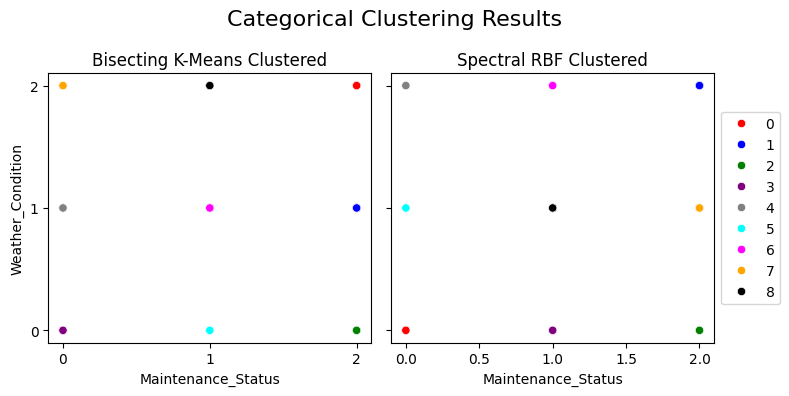

In [115]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
x = df_processed.columns[0]
y = df_processed.columns[1]
data = df_processed[[x, y]]
ticks = [0, 1, 2]

bisecting_model = BisectingKMeans(
    n_clusters=9, random_state=random_state, init=init, n_init=n_init, max_iter=max_iter).fit(data)
spectral_rbf = SpectralClustering(n_clusters=9, random_state=random_state,
                                  assign_labels='cluster_qr', affinity='rbf', n_jobs=n_jobs).fit(data)

df_processed['bisecting_categorical_labels'] = bisecting_model.labels_
df_processed['spectral_rbf_categorical_labels'] = spectral_rbf.labels_

palette = ['red', 'blue', 'green', 'purple',
           'grey', 'cyan', 'magenta', 'orange', 'black']

sns.scatterplot(data=df_processed, x=x, y=y, palette=palette,
                hue='bisecting_categorical_labels', legend=False, ax=ax[0])
sns.scatterplot(data=df_processed, x=x, y=y, palette=palette,
                hue='spectral_rbf_categorical_labels', ax=ax[1])

ax[0].set_xticks(ticks)
ax[1].set_yticks(ticks)

ax[0].set_title('Bisecting K-Means Clustered')
ax[1].set_title('Spectral RBF Clustered')

handles, labels = ax[-1].get_legend_handles_labels()
ax[1].legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
position_title = 0.43

fig.suptitle('Categorical Clustering Results', fontsize=16)
plt.tight_layout()
plt.show()

In [116]:
df_processed.columns

Index(['Maintenance_Status', 'Weather_Condition', 'Route_Type', 'Ship_Type',
       'Engine_Type', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage', 'ICA Component 0', 'ICA Component 1',
       'minibatch_numerical_labels', 'bisecting_numerical_labels',
       'spectral_rbf_numerical_labels', 'bisecting_categorical_labels',
       'spectral_rbf_categorical_labels'],
      dtype='object')

In [117]:
df_processed.drop(columns=['minibatch_numerical_labels',
                  'spectral_rbf_numerical_labels', 'spectral_rbf_categorical_labels'], inplace=True)

df_processed.rename(

    columns={

        'bisecting_numerical_labels': 'Numerical Cluster',

        'bisecting_categorical_labels': 'Categorical Cluster'

    },

    inplace=True

)

In [118]:
df_processed.head()

,Maintenance_Status,Weather_Condition,Route_Type,Ship_Type,Engine_Type,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,...,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,ICA Component 0,ICA Component 1,Numerical Cluster,Categorical Cluster
1,2,0,Short-haul,Fish Carrier,Steam Turbine,0.025219,0.518350,0.518533,0.966277,0.057553,...,0.877777,0.854481,0.136018,0.385945,0.625,0.878718,0.522081,-0.436290,0,2
2,1,1,Long-haul,Container Ship,Diesel,0.716864,0.459279,0.312357,0.219996,0.065581,...,0.361960,0.623798,0.285686,0.906517,1.000,0.925231,1.653215,1.116576,1,6
3,1,1,Transoceanic,Bulk Carrier,Steam Turbine,0.737246,0.165608,0.552589,0.679530,0.865698,...,0.039180,0.173291,0.431118,0.871380,0.000,0.324021,-1.784144,-0.526916,3,6
4,1,1,Transoceanic,Fish Carrier,Diesel,0.249169,0.235476,0.716076,0.473158,0.107941,...,0.659079,0.869660,0.880651,0.083444,0.875,0.600650,1.205275,0.957424,1,6
5,1,0,Long-haul,Fish Carrier,Heavy Fuel Oil (HFO),0.574456,0.668767,0.345433,0.992633,0.955556,...,0.765010,0.591406,0.908450,0.938453,0.750,0.063334,0.710696,-0.201100,0,5


## **c. Feature Selection**


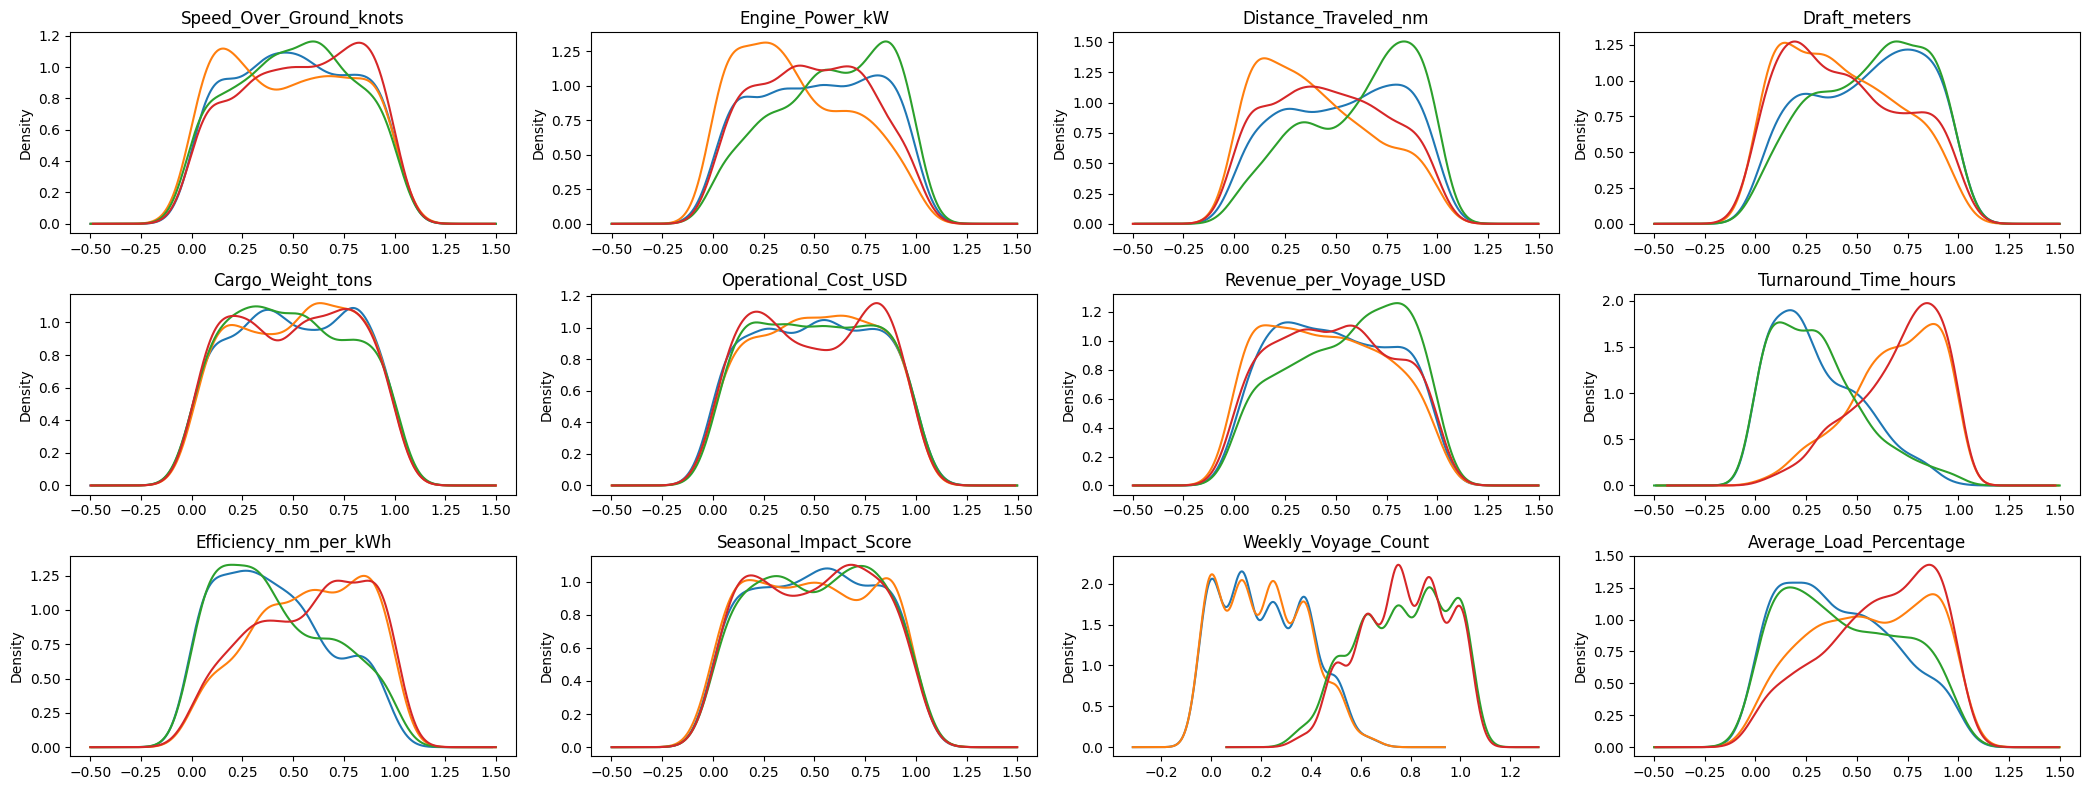

In [133]:
fig, ax = plt.subplots(3, 4, figsize=(21, 8))
ax = ax.flatten()

palette = 'pastel'
data = df_processed
x = 'Numerical Cluster'
legend_status = False
fill_status = False

for i, column in enumerate(df_processed.columns[5:17]):
    indexes = []
    for j in range(len(df_processed[x].unique())):
        indexes.append(df_processed[df_processed[x] == j].index)
    for index in indexes:
        df_processed.loc[index, column].plot(kind='kde', ax=ax[i])
    ax[i].set_title(column)

plt.tight_layout()
plt.show()

Therefore, here are the features we should use:

- Draft
- Turnaround
- Efficiency
- Distance
- Engine Power
- Revenue
- Average Load


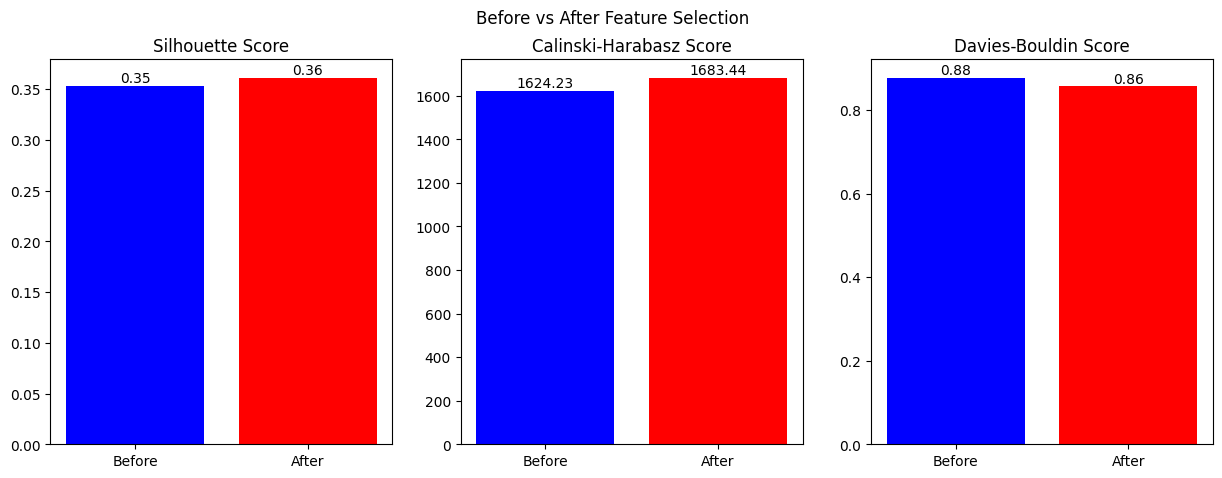

In [134]:
first_data = df_processed.columns[5:17]
second_data = [
    'Draft_meters', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Distance_Traveled_nm',
    'Engine_Power_kW', 'Revenue_per_Voyage_USD', 'Average_Load_Percentage', 'Weekly_Voyage_Count'
]

ica = FastICA(n_components=2, random_state=42)
first_ica = ica.fit_transform(df_processed[first_data])
x1 = first_ica[:, 0]
y1 = first_ica[:, 1]
second_ica = ica.fit_transform(df_processed[second_data])
x2 = second_ica[:, 0]
y2 = second_ica[:, 1]

bm = BisectingKMeans(n_clusters=4, random_state=random_state,
                     init=init, n_init=n_init, max_iter=max_iter)

# Transpose to get correct shape
first_score = get_scores(bm, np.array([x1, y1]).T)
# Transpose to get correct shape
second_score = get_scores(bm, np.array([x2, y2]).T)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(['Before', 'After'], [first_score['silhouette'],
          second_score['silhouette']], color=['blue', 'red'])
ax[1].bar(['Before', 'After'], [first_score['calinski'],
          second_score['calinski']], color=['blue', 'red'])
ax[2].bar(['Before', 'After'], [first_score['davies'],
          second_score['davies']], color=['blue', 'red'])

ax[0].set_title('Silhouette Score')
ax[1].set_title('Calinski-Harabasz Score')
ax[2].set_title('Davies-Bouldin Score')

for axis in ax:
    for bar in axis.patches:
        count = bar.get_height()
        axis.annotate(str(round(count, 2)), (bar.get_x() +
                      bar.get_width() / 2, count), ha='center', va='bottom')

fig.suptitle('Before vs After Feature Selection')
plt.show()

In [135]:
ica = FastICA(n_components=2, random_state=42)
ica_results = ica.fit_transform(df_processed[second_data])
df_processed.loc[:, 'ICA Component 0'] = ica_results[:, 0]
df_processed.loc[:, 'ICA Component 1'] = ica_results[:, 1]

bkmeans = BisectingKMeans(n_clusters=4, random_state=random_state, init=init, n_init=n_init,
                          max_iter=max_iter).fit(df_processed[['ICA Component 0', 'ICA Component 1']])
df_processed.loc[:, 'Numerical Cluster'] = bkmeans.labels_

## **d. Visualization of Clustering Results**


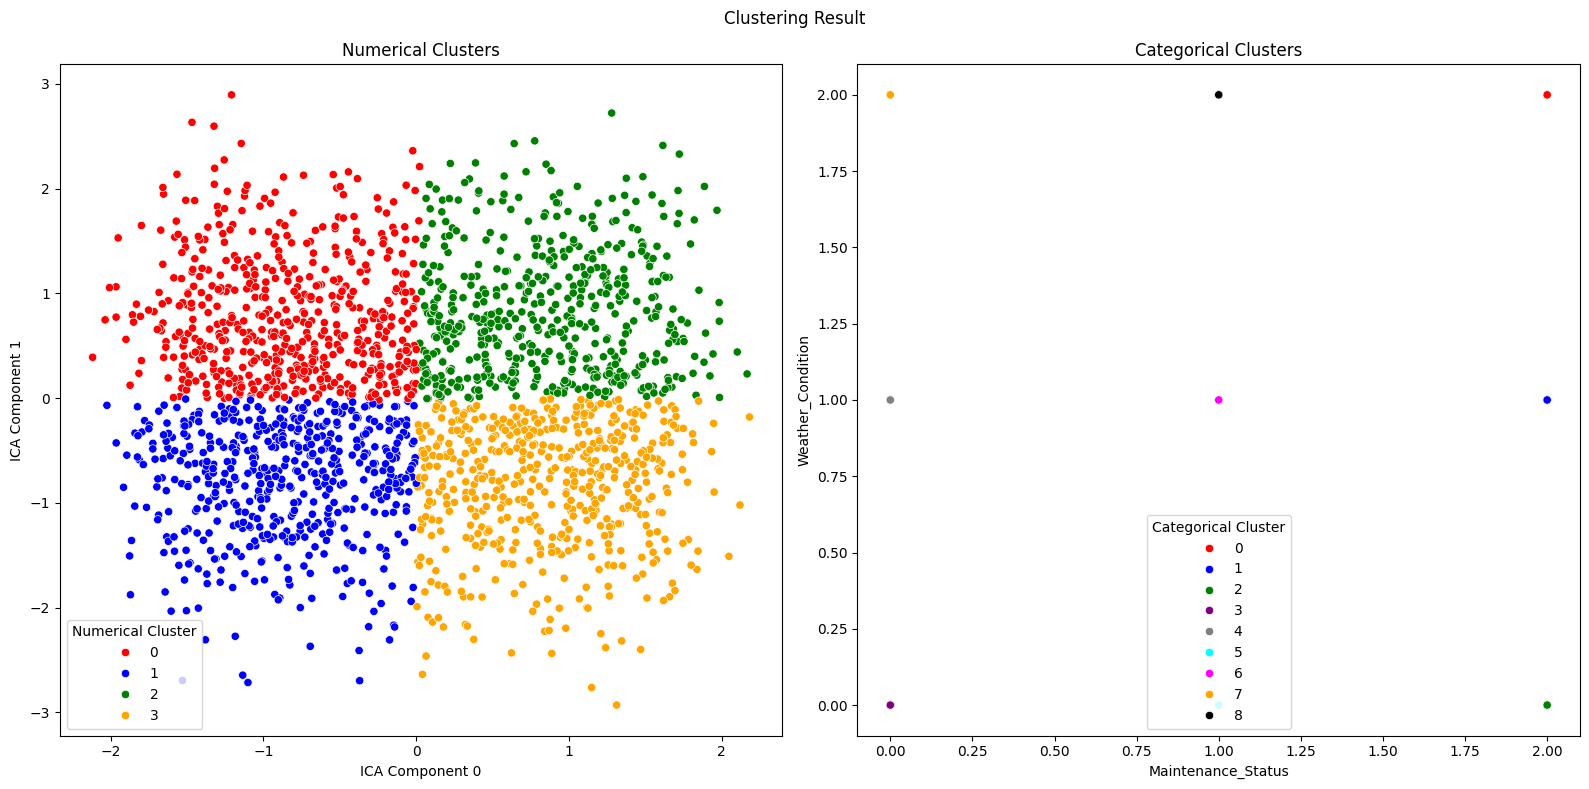

In [136]:
fig, ax = plt.subplots(1, 2, sharey=False, figsize=(16, 8))

numerical_palette = ['red', 'blue', 'green', 'orange']
categorical_palette = ['red', 'blue', 'green', 'purple',
                       'grey', 'cyan', 'magenta', 'orange', 'black']

sns.scatterplot(data=df_processed, x='ICA Component 0', y='ICA Component 1',
                palette=numerical_palette, hue='Numerical Cluster', legend=True, ax=ax[0])
sns.scatterplot(data=df_processed, x='Maintenance_Status', y='Weather_Condition',
                palette=categorical_palette, hue='Categorical Cluster', legend=True, ax=ax[1])

ax[0].set_title('Numerical Clusters', fontsize=12)
ax[1].set_title('Categorical Clusters', fontsize=12)
fig.suptitle('Clustering Result')
plt.tight_layout()
plt.show()

## **e. Analysis and Interpretation of Cluster Results**


In [137]:
df.loc[:, ['Numerical Cluster', 'Categorical Cluster']
       ] = df_processed.loc[:, ['Numerical Cluster', 'Categorical Cluster']]

df = df.astype({'Numerical Cluster': 'str', 'Categorical Cluster': 'str'})

### Target Interpretation


#### Numerical Target


The features used are:

- Draft
- Turnaround
- Efficiency
- Distance
- Engine Power
- Revenue
- Average Load


In [138]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Numerical Cluster,Categorical Cluster
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,2,10.387580,1796.057415,1060.486382,14.653083,0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3,2
2,2023-06-18,Container Ship,Long-haul,Diesel,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,3,6
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,0,6
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3,6
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),1,18.616196,2171.646567,723.304215,14.916320,0,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,2,5


In [139]:
cols = [col for col in second_data]
cols.extend(['Numerical Cluster'])
cols

['Draft_meters',
 'Turnaround_Time_hours',
 'Efficiency_nm_per_kWh',
 'Distance_Traveled_nm',
 'Engine_Power_kW',
 'Revenue_per_Voyage_USD',
 'Average_Load_Percentage',
 'Weekly_Voyage_Count',
 'Numerical Cluster']

In [140]:
df[cols].groupby(by=['Numerical Cluster']).mean()

,Draft_meters,Turnaround_Time_hours,Efficiency_nm_per_kWh,Distance_Traveled_nm,Engine_Power_kW,Revenue_per_Voyage_USD,Average_Load_Percentage,Weekly_Voyage_Count
Numerical Cluster,,,,,,,,
0,10.480433,30.295242,0.671359,1091.013878,1791.313154,517931.392462,70.734976,2.721818
1,9.249487,52.910975,0.904913,842.334410,1523.108541,480551.173749,77.916588,2.693333
2,10.642038,30.402132,0.681662,1253.114920,1954.648435,579129.289205,71.946636,7.134725
3,9.445260,54.076602,0.907753,966.163031,1731.981786,516148.004780,80.133444,7.169524


Cluster 1:

- **Average Draft_meters (m):** 10.48
- **Average Turnaround_Time_hours (h):** 30.29
- **Average Efficiency_nm_per_kWh (nm/kWh):** 0.671
- **Average Distance_Traveled_nm (nm):** 1091.01
- **Average Engine_Power_kW (kW):** 1791.31
- **Average Revenue_per_Voyage_USD (USD):** 517931.39
- **Average Average_Load_Percentage (%):** 70.73
- **Average Weekly_Voyage_Count:** 2.72


Cluster 2:

- **Average Draft_meters (m):** 9.24
- **Average Turnaround_Time_hours (h):** 52.91
- **Average Efficiency_nm_per_kWh (nm/kWh):** 0.904
- **Average Distance_Traveled_nm (nm):** 842.334
- **Average Engine_Power_kW (kW):** 1523.10
- **Average Revenue_per_Voyage_USD (USD):** 480551.17
- **Average Average_Load_Percentage (%):** 77.91
- **Average Weekly_Voyage_Count:** 2.69


Cluster 3:

- **Average Draft_meters (m):** 10.64
- **Average Turnaround_Time_hours (h):** 30.04
- **Average Efficiency_nm_per_kWh (nm/kWh):** 0.681
- **Average Distance_Traveled_nm (nm):** 1253.11
- **Average Engine_Power_kW (kW):** 1954.64
- **Average Revenue_per_Voyage_USD (USD):** 579129.28
- **Average Average_Load_Percentage (%):** 71.94
- **Average Weekly_Voyage_Count:** 7.13


Cluster 4:

- **Average Draft_meters (m):** 9.44
- **Average Turnaround_Time_hours (h):** 54.07
- **Average Efficiency_nm_per_kWh (nm/kWh):** 0.90
- **Average Distance_Traveled_nm (nm):** 966.16
- **Average Engine_Power_kW (kW):** 1731.98
- **Average Revenue_per_Voyage_USD (USD):** 516148.005
- **Average Average_Load_Percentage (%):** 80.13
- **Average Weekly_Voyage_Count:** 7.17


TLDR:

- Cluster 1 with average draft meters 10 m, requires a minimal amount of time to dock, high distance, medium engine power, medium revenue, low efficiency, low load, and low voyage count.
  (**Large Ship, Low Performance, Low Load, Long Distance, Medium Profit**).

- Cluster 2 with average draft meters 9 m, requires an extended amount of time to dock, low distance, low engine power, low revenue, high efficiency, high load, and low voyage count.
  (**Small Ship, High Performance, High Load, Short Distance, Low Profit**).

- Cluster 3 with average draft meters 10 m, requires a minimal amount of time to dock, high distance, high engine power, high revenue, low efficiency, medium load, and high voyage count.
  (**Large Ship, Medium Performance, Medium Load, Long Distance, High Profit**).

- Cluster 4 with average draft meters 9 m, requires an extended amount of time to dock, Low distance, Low engine power, medium revenue, high efficiency, high load, and high voyage count.
  (**Small Ship, Medium Performance, High Load, Short Distance, Medium Profit**).


#### Categorical Target


In [141]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Numerical Cluster,Categorical Cluster
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,2,10.387580,1796.057415,1060.486382,14.653083,0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3,2
2,2023-06-18,Container Ship,Long-haul,Diesel,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,3,6
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,0,6
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3,6
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),1,18.616196,2171.646567,723.304215,14.916320,0,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,2,5


In [142]:
pd.crosstab(index=df['Categorical Cluster'], columns=df['Maintenance_Status'])

Maintenance_Status,0,1,2
Categorical Cluster,,,
0,0,0,225
1,0,0,240
2,0,0,233
3,219,0,0
4,228,0,0
5,0,213,0
6,0,270,0
7,269,0,0
8,0,230,0


In [143]:
pd.crosstab(index=df['Categorical Cluster'], columns=df['Weather_Condition'])

Weather_Condition,0,1,2
Categorical Cluster,,,
0,0,0,225
1,0,240,0
2,233,0,0
3,219,0,0
4,0,228,0
5,213,0,0
6,0,270,0
7,0,0,269
8,0,0,230


Based on Ship Condition:

- **Critical (4, 5, 8)**
- **Safe (6, 7, 9)**
- **Good (1, 2, 3)**

Based on Weather Condition:

- **Bad (3, 4, 6)**
- **Good (2, 5, 7)**
- **Calm (1, 8, 9)**


### Target Combination


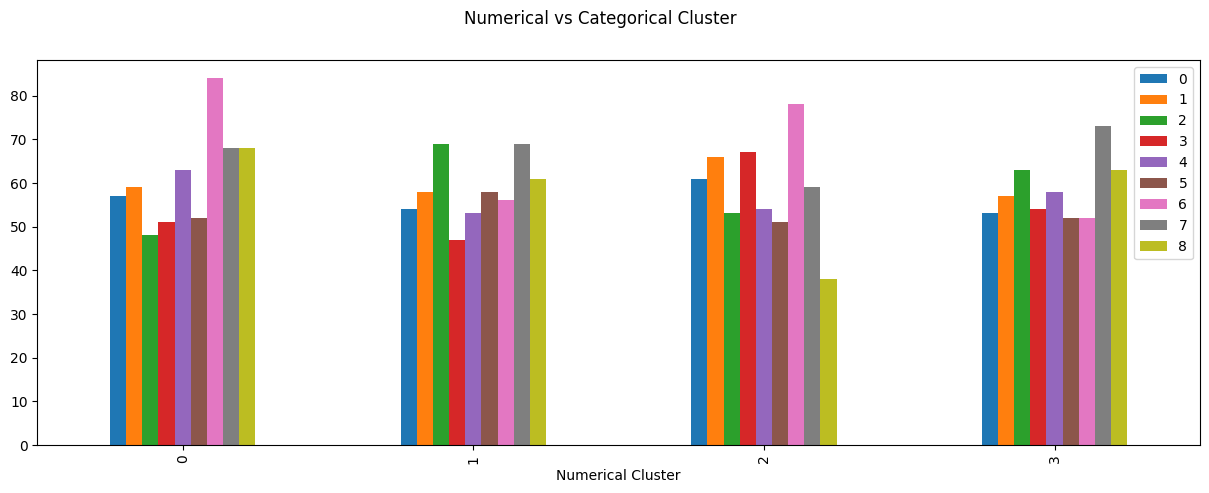

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
pd.crosstab(index=df_processed['Numerical Cluster'], columns=df_processed['Categorical Cluster']).plot(
    kind='bar', ax=ax, legend=False)
fig.suptitle('Numerical vs Categorical Cluster')
ax.legend()
plt.show()

In [145]:
x = df_processed.columns[0]
y = df_processed.columns[1]
data = df_processed[[x, y]]

bisecting_model = BisectingKMeans(
    n_clusters=9, random_state=random_state, init=init, n_init=n_init, max_iter=max_iter).fit(data)

df_processed['Categorical Cluster'] = bisecting_model.labels_

In [146]:
pd.crosstab(index=df['Numerical Cluster'], columns=df['Categorical Cluster'])

Categorical Cluster,0,1,2,3,4,5,6,7,8
Numerical Cluster,,,,,,,,,
0,57,59,48,51,63,52,84,68,68
1,54,58,69,47,53,58,56,69,61
2,61,66,53,67,54,51,78,59,38
3,53,57,63,54,58,52,52,73,63


Conclusion: Keep separate labels for cluster types.


The distribution appears to be identical, therefore the two labels cannot be combined.


# **7. Export Data**


In [147]:
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Numerical Cluster,Categorical Cluster
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,2,10.387580,1796.057415,1060.486382,14.653083,0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3,2
2,2023-06-18,Container Ship,Long-haul,Diesel,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,3,6
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,0,6
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3,6
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),1,18.616196,2171.646567,723.304215,14.916320,0,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,2024-05-19,Container Ship,Long-haul,Heavy Fuel Oil (HFO),2,24.257402,1813.474360,147.964296,10.378736,1,1450.181358,266359.224719,820652.038923,34.433655,0.708172,1.352973,7,51.258697,2,1
2730,2024-05-26,Tanker,Long-haul,Diesel,0,15.649207,1662.426557,1175.942724,12.564046,0,451.670997,393827.995941,567287.169653,22.281638,0.356031,1.079178,2,92.926949,0,3
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114,1,1
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622,0,1


In [148]:
df.to_csv('./Clustered_Ship_Performance_Dataset.csv')